In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

In [2]:
data = pd.read_csv('/Users/amulya/Desktop/Capstone/DSCI-601-Amy/Data/FeatureEngineered/AKAM_feature_engineeredv2.csv')

In [3]:
data['date'] = pd.to_datetime(data['date'])
data.set_index('date', inplace=True)

In [4]:
features = [['VOL_CHANGE', 'BA_SPREAD', 'ILLIQUIDITY', 'TURNOVER', 'MARKET_CAP', 'TRAN_COST', 'ASK', 'BID', 'day_of_week',
            'day_of_month', 'month', 'is_month_start', 'is_month_end', 'year', 'week', 'RET_ema_12', 'RET_ema_26',
            'RET_skew_10', 'RET_kurtosis_10', 'RET_entropy_10', 'RSI', 'OBV', 'RET_lag_1', 'RET_lag_7', 'RET_lag_14',
            'RET_lag_30', 'RET_mean_7d', 'RET_std_7d', 'RET_mean_14d', 'RET_std_14d', 'RET_mean_30d', 'RET_std_30d']]

targets = data[['PRC', 'RET']]

print(type(features), type(targets))

<class 'list'> <class 'pandas.core.frame.DataFrame'>


In [7]:
data.isnull().sum()

TICKER              0
CUSIP               0
COMNAM              0
RET                 0
VOL_CHANGE          0
BA_SPREAD           0
ILLIQUIDITY         0
sprtrn              0
TURNOVER            0
PRC                 0
SHROUT              0
MARKET_CAP          0
TRAN_COST           0
ASK                 0
BID                 0
day_of_week         0
day_of_month        0
month               0
is_month_start      0
is_month_end        0
year                0
week                0
RET_ema_12          0
RET_ema_26          0
RET_skew_10         9
RET_kurtosis_10     9
RET_entropy_10      9
RSI                13
OBV                 1
RET_lag_1           1
RET_lag_7           7
RET_lag_14         14
RET_lag_30         30
RET_mean_7d         7
RET_std_7d          8
RET_mean_14d       14
RET_std_14d        15
RET_mean_30d       30
RET_std_30d        31
dtype: int64

# Data Loading and Preprocessing

In [8]:
import pandas as pd

# Convert features and targets to DataFrame or Series
features = pd.DataFrame(features)  # or pd.Series(features) if it's 1D
targets = pd.DataFrame(targets)    # or pd.Series(targets) if it's 1D

# Fill missing values
features.fillna(method='ffill', inplace=True)
targets.fillna(method='ffill', inplace=True)


/var/folders/69/00tjyfg95_d37pp6ql47yf9h0000gn/T/ipykernel_21872/4235152415.py:8: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  features.fillna(method='ffill', inplace=True)
/var/folders/69/00tjyfg95_d37pp6ql47yf9h0000gn/T/ipykernel_21872/4235152415.py:9: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  targets.fillna(method='ffill', inplace=True)


In [8]:
features.dropna()

,VOL_CHANGE,BA_SPREAD,ILLIQUIDITY,sprtrn,TURNOVER,MARKET_CAP,TRAN_COST,ASK,BID,RSI,OBV,RET_ema_12,RET_ema_26,RET_lag_1,RET_lag_7,RET_mean_7d,RET_std_7d
date,,,,,,,,,,,,,,,,,
1999-11-18,0.059361,0.001334,-1.759779e-10,0.010087,3.502592,17133944.75,0.12500,187.5000,187.2500,36.511402,0.000269,0.028321,0.077609,0.029212,0.011663,0.042592,0.094303
1999-11-19,0.119538,0.000338,-1.600667e-10,-0.002063,4.680902,16916770.00,0.03125,185.2500,185.1875,36.413060,0.000016,0.022014,0.070921,-0.010561,0.001318,0.014123,0.063797
1999-11-22,0.042994,0.000338,-1.438037e-11,-0.000745,2.780692,16905339.75,0.03125,184.9375,184.8750,42.418519,0.000532,0.018523,0.065618,-0.012675,-0.041118,-0.006862,0.051624
1999-11-23,0.635397,0.001190,4.014759e-10,-0.011471,17.628059,19202820.00,0.12500,210.2500,210.0000,60.069754,0.087314,0.036581,0.070824,-0.000676,-0.026758,-0.009295,0.052179
1999-11-24,0.015074,0.001866,-4.091732e-10,0.008856,5.698661,18379842.00,0.18750,202.3750,202.0000,53.019856,0.084620,0.024360,0.062403,0.135903,-0.031371,-0.000585,0.039573
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-22,0.058504,0.000418,9.309199e-12,0.001660,6.477677,18042523.84,0.02500,119.6600,119.6100,51.251332,1.533211,0.002344,0.002657,0.001089,0.018816,0.001997,0.009157
2023-12-26,0.057158,0.000084,-1.370276e-11,0.004232,4.737934,18021407.36,0.00500,119.4700,119.4600,50.698524,1.533082,0.001803,0.002373,0.001088,0.007064,0.003351,0.009097
2023-12-27,0.142502,0.000252,-3.029631e-11,0.001430,7.387060,17949008.00,0.01500,119.0400,119.0100,53.508076,1.532676,0.000908,0.001900,-0.001170,0.006845,0.005750,0.006972


In [9]:
features.isnull().sum()

VOL_CHANGE      0
BA_SPREAD       0
ILLIQUIDITY     0
sprtrn          0
TURNOVER        0
MARKET_CAP      0
TRAN_COST       0
ASK             0
BID             0
RSI            13
OBV             1
RET_ema_12      0
RET_ema_26      0
RET_lag_1       1
RET_lag_7       7
RET_mean_7d     7
RET_std_7d      8
dtype: int64

In [10]:
features.fillna(features.mean(), inplace=True)

### Normalization and Modeling

In [11]:
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(features)

scaler_targets = MinMaxScaler()
scaled_targets = scaler_targets.fit_transform(targets)

In [12]:
# 30 day window for prediction - look back
def create_sequences(features, targets, look_back=30):
    X, y = [], []
    for i in range(len(features) - look_back):
        X.append(features[i:i + look_back])
        y.append(targets[i + look_back])
    return np.array(X), np.array(y)

In [13]:
look_back = 30  # Use last 30 days to predict the next day
X, y = create_sequences(scaled_features, scaled_targets, look_back)

In [14]:
# training and testing - 8:2

train_size = int(0.8 * len(X))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Build and train lstm model

In [15]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

In [16]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, input_shape=(look_back, X_train.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(64, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(2)) 

/Users/amulya/.pyenv/versions/3.10.10/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


# Debugging

In [31]:
print(f"X_train shape: {X_train.shape}")


X_train shape: (4840, 30, 17)


In [32]:
# Ensure X_train and X_test are 3D: (samples, timesteps, features)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], X_train.shape[2]))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], X_test.shape[2]))

print(f"Reshaped X_train shape: {X_train.shape}")
print(f"Reshaped X_test shape: {X_test.shape}")


Reshaped X_train shape: (4840, 30, 17)
Reshaped X_test shape: (1210, 30, 17)


In [33]:
def create_sequences(features, targets, look_back=30):
    X, y = [], []
    for i in range(len(features) - look_back):
        X.append(features[i:i + look_back])
        y.append(targets[i + look_back])
    return np.array(X), np.array(y)

# Generate sequences
X, y = create_sequences(scaled_features, scaled_targets, look_back=30)

# Check shape of generated sequences
print(f"X shape: {X.shape}, y shape: {y.shape}")


X shape: (6050, 30, 17), y shape: (6050, 2)


In [34]:
input_shape = (X_train.shape[1], X_train.shape[2])  # (timesteps, features)
print(f"Input shape for LSTM: {input_shape}")

# Define the model
model = Sequential()
model.add(LSTM(64, return_sequences=True, input_shape=input_shape))
model.add(Dropout(0.2))
model.add(LSTM(64, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(2))  # Predict both Price and Return

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')


Input shape for LSTM: (30, 17)


ValueError: object __array__ method not producing an array

In [42]:
print(f"X_train shape: {X_train.shape}")  # Should be (samples, timesteps, features)
print(f"X_test shape: {X_test.shape}")    # Should be (samples, timesteps, features)


X_train shape: (4840, 30, 17)
X_test shape: (1210, 30, 17)


In [43]:
# Ensure X_train and X_test are numpy arrays with correct dtype
import numpy as np

X_train = np.array(X_train, dtype=np.float32)
X_test = np.array(X_test, dtype=np.float32)

print(X_train.dtype)  # Should print float32


float32


In [44]:
# Replace NaNs and Infs with 0 or other appropriate values
X_train = np.nan_to_num(X_train, nan=0.0, posinf=0.0, neginf=0.0)
X_test = np.nan_to_num(X_test, nan=0.0, posinf=0.0, neginf=0.0)


In [45]:
print(f"Final X_train shape: {X_train.shape}")  # Should be (samples, timesteps, features)


Final X_train shape: (4840, 30, 17)


In [47]:
from tensorflow.keras.layers import Input

model = Sequential()
model.add(Input(shape=(X_train.shape[1], X_train.shape[2])))
model.add(LSTM(64, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(64, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(2))

model.compile(optimizer='adam', loss='mean_squared_error')
print("Model with Input layer compiled successfully!")


ValueError: object __array__ method not producing an array

In [48]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense, Input

# Define the model with an explicit Input layer
model = Sequential()
model.add(Input(shape=(X_train.shape[1], X_train.shape[2])))  # (timesteps, features)
model.add(LSTM(64, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(64, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(2))  # Predicting Price and Return

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

print("Model successfully compiled!")


ValueError: object __array__ method not producing an array

In [49]:
pip show tensorflow


Name: tensorflow
Version: 2.17.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: /Users/amulya/.pyenv/versions/3.10.10/lib/python3.10/site-packages
Requires: absl-py, astunparse, flatbuffers, gast, google-pasta, grpcio, h5py, keras, libclang, ml-dtypes, numpy, opt-einsum, packaging, protobuf, requests, setuptools, six, tensorboard, tensorflow-io-gcs-filesystem, termcolor, typing-extensions, wrapt
Required-by: 
Note: you may need to restart the kernel to use updated packages.


In [50]:
# Create a dummy dataset with shape (100 samples, 30 timesteps, 17 features)
X_dummy = np.random.random((100, 30, 17)).astype(np.float32)
y_dummy = np.random.random((100, 2)).astype(np.float32)

# Define a minimal LSTM model
model = Sequential()
model.add(LSTM(64, return_sequences=True, input_shape=(30, 17)))
model.add(Dropout(0.2))
model.add(LSTM(64, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(2))  # Predicting 2 values

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train on dummy data
model.fit(X_dummy, y_dummy, epochs=1, batch_size=32)

print("Model successfully trained on dummy data!")


ValueError: object __array__ method not producing an array

#### Problem with input data - debugging further

In [51]:
import numpy as np

# Check if X_train is properly formatted as a NumPy array
if not isinstance(X_train, np.ndarray):
    print("X_train is not a NumPy array, converting...")
    X_train = np.array(X_train, dtype=np.float32)
else:
    print("X_train is a NumPy array")

# Ensure the shape is correct
print(f"X_train shape: {X_train.shape}, dtype: {X_train.dtype}")


X_train is a NumPy array
X_train shape: (4840, 30, 17), dtype: float32


In [52]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Create dummy data: 100 samples, 30 timesteps, 17 features
X_dummy = np.random.random((100, 30, 17)).astype(np.float32)
y_dummy = np.random.random((100, 2)).astype(np.float32)

# Define a minimal LSTM model
model = Sequential()
model.add(LSTM(64, return_sequences=True, input_shape=(30, 17)))
model.add(Dropout(0.2))
model.add(LSTM(64, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(2))  # Predicting 2 outputs

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model with dummy data
model.fit(X_dummy, y_dummy, epochs=1, batch_size=32)

print("Model successfully trained on dummy data!")


ValueError: object __array__ method not producing an array

In [54]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Create minimal dummy data (10 samples, 5 timesteps, 3 features)
X_dummy = tf.random.normal((10, 5, 3))
y_dummy = tf.random.normal((10, 2))

# Define a minimal LSTM model
model = Sequential()
model.add(LSTM(4, input_shape=(5, 3)))  # Small LSTM with 4 units
model.add(Dense(2))  # Predict 2 values

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model on dummy data
model.fit(X_dummy, y_dummy, epochs=1, batch_size=2)

print("Model trained successfully!")


ValueError: object __array__ method not producing an array

In [57]:
pip list | grep tensorflow


tensorflow                   2.17.0
tensorflow-io-gcs-filesystem 0.37.1
Note: you may need to restart the kernel to use updated packages.


# ---------- End of Debugging

In [17]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [18]:
model.fit(X_train, y_train, epochs=15, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/15
152/152 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0135 - val_loss: 5.7239e-04
Epoch 2/15
152/152 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0032 - val_loss: 4.1213e-04
Epoch 3/15
152/152 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0028 - val_loss: 8.0866e-04
Epoch 4/15
152/152 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0027 - val_loss: 6.6491e-04
Epoch 5/15
152/152 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0026 - val_loss: 6.9129e-04
Epoch 6/15
152/152 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0026 - val_loss: 5.5724e-04
Epoch 7/15
152/152 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0025 - val_loss: 4.6328e-04
Epoch 8/15
152/152 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0026 - val_loss: 8.4281e-04
Epoch 9/15
152/152 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0023 - val_loss: 3.7664e-04
Epoch 10/15
152/152 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0024 - val_loss: 8.5403e-04
Epoch 11/15
152/152 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0024 - val_loss: 3.8048e-

In [19]:
# Make predictions on the test set
predictions = model.predict(X_test)

# Inverse scale the predictions and actual targets
predictions_rescaled = scaler_targets.inverse_transform(predictions)
y_test_rescaled = scaler_targets.inverse_transform(y_test)

# Extract predicted and actual prices and returns
predicted_prices = predictions_rescaled[:, 0]
predicted_returns = predictions_rescaled[:, 1]
actual_prices = y_test_rescaled[:, 0]
actual_returns = y_test_rescaled[:, 1]


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


In [20]:
from sklearn.metrics import mean_squared_error


rmse_price = np.sqrt(mean_squared_error(actual_prices, predicted_prices))
rmse_return = np.sqrt(mean_squared_error(actual_returns, predicted_returns))

print(f'RMSE (Price): {rmse_price}')
print(f'RMSE (Return): {rmse_return}')


RMSE (Price): 0.012280917961551938
RMSE (Return): 0.01819456546161528


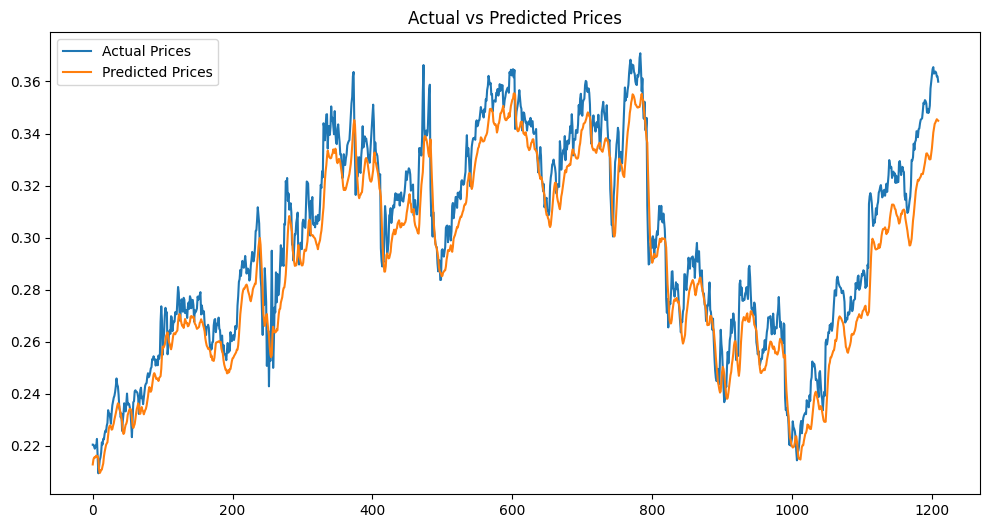

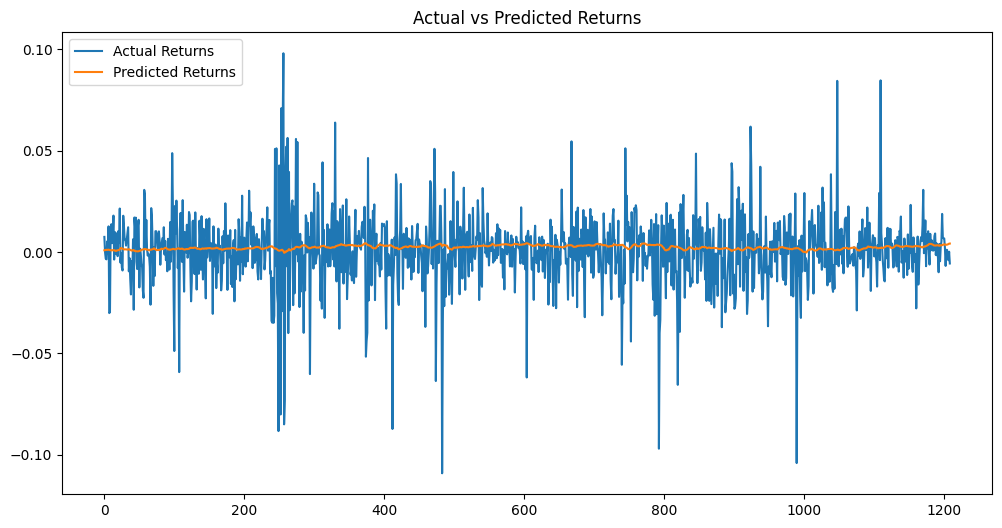

In [21]:
import matplotlib.pyplot as plt

# predicted vs actual prices
plt.figure(figsize=(12, 6))
plt.plot(actual_prices, label='Actual Prices')
plt.plot(predicted_prices, label='Predicted Prices')
plt.legend()
plt.title('Actual vs Predicted Prices')
plt.show()

# predicted vs actual returns
plt.figure(figsize=(12, 6))
plt.plot(actual_returns, label='Actual Returns')
plt.plot(predicted_returns, label='Predicted Returns')
plt.legend()
plt.title('Actual vs Predicted Returns')
plt.show()


In [22]:
# Use the last sequence from the test set to predict the next day
last_sequence = X_test[-1].reshape((1, look_back, X_test.shape[2]))
future_prediction = model.predict(last_sequence)

# Inverse scale the future prediction
future_prediction_rescaled = scaler_targets.inverse_transform(future_prediction)

# Print the predicted price and return for the next day
print(f'Predicted Price: {future_prediction_rescaled[0, 0]}')
print(f'Predicted Return: {future_prediction_rescaled[0, 1]}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Predicted Price: 0.34490150213241577
Predicted Return: 0.004204150289297104


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Predicted Price: 0.34490150213241577
Predicted Return: 0.004204150289297104


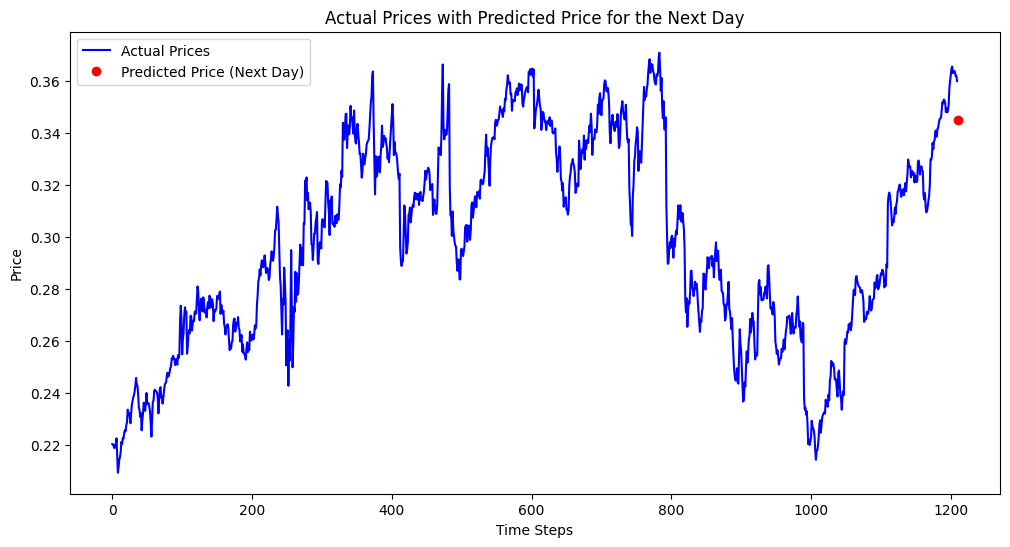

In [23]:
import matplotlib.pyplot as plt
import numpy as np

# Use the last sequence from the test set to predict the next day
last_sequence = X_test[-1].reshape((1, look_back, X_test.shape[2]))  # Shape: (1, 30, 17)
future_prediction = model.predict(last_sequence)

# Inverse transform the prediction to original scale
future_prediction_rescaled = scaler_targets.inverse_transform(future_prediction)

# Extract the predicted price and return
predicted_price = future_prediction_rescaled[0, 0]
predicted_return = future_prediction_rescaled[0, 1]

# Print predicted price and return
print(f'Predicted Price: {predicted_price}')
print(f'Predicted Return: {predicted_return}')

# Prepare historical prices for plotting
actual_prices = scaler_targets.inverse_transform(y_test)[:, 0]  # Actual prices from test set

# Create an array to plot future price along with past prices
extended_prices = np.append(actual_prices, predicted_price)

# Plot historical prices along with the future prediction
plt.figure(figsize=(12, 6))
plt.plot(range(len(actual_prices)), actual_prices, label='Actual Prices', color='blue')
plt.plot(len(actual_prices), predicted_price, 'ro', label='Predicted Price (Next Day)')
plt.title('Actual Prices with Predicted Price for the Next Day')
plt.xlabel('Time Steps')
plt.ylabel('Price')
plt.legend()
plt.show()


# Predict for 30 days

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/ste

<module 'matplotlib.pyplot' from '/Users/amulya/.pyenv/versions/3.10.10/lib/python3.10/site-packages/matplotlib/pyplot.py'>

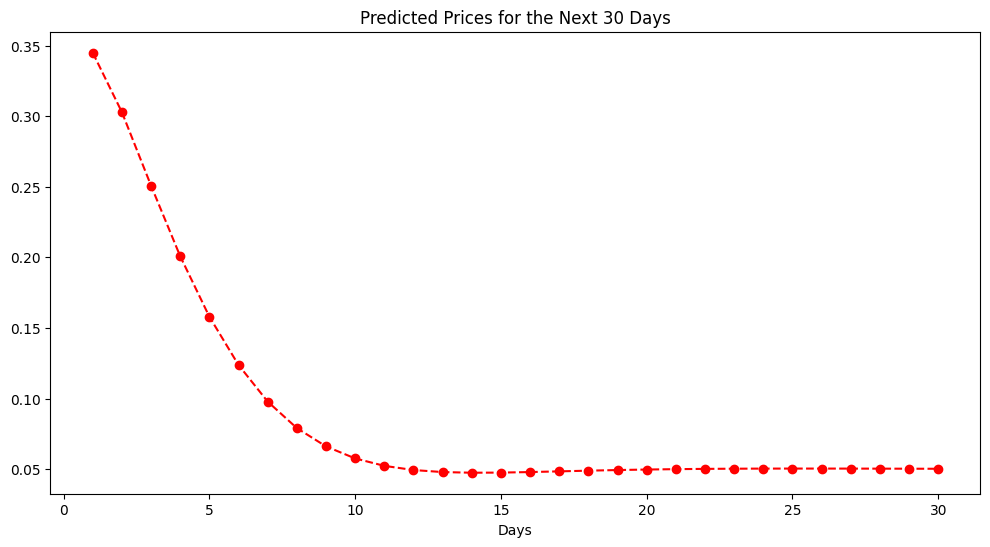

In [25]:
import numpy as np
import matplotlib.pyplot as plt

# Start with the last sequence from the test set
last_sequence = X_test[-1]  # Shape: (look_back, num_features)
predicted_prices = []

# Predict for the next 30 days
for _ in range(30):
    # Reshape the last sequence to (1, look_back, num_features) for prediction
    last_sequence_reshaped = last_sequence.reshape(1, look_back, X_test.shape[2])

    # Predict the next day's price and return
    next_prediction = model.predict(last_sequence_reshaped)

    # Inverse transform the prediction to get actual scale
    next_prediction_rescaled = scaler_targets.inverse_transform(next_prediction)

    # Extract the predicted price and save it
    predicted_price = next_prediction_rescaled[0, 0]  # First column is the price
    predicted_prices.append(predicted_price)

    # Create a new input for the next step by appending the new prediction
    # Pad the new prediction to match feature size (1, 17)
    next_input = np.zeros((1, X_test.shape[2]))  # Shape: (1, 17)
    next_input[0, :2] = next_prediction  # Assign price and return to the first 2 columns

    # Shift the sequence and add the new input
    last_sequence = np.append(last_sequence[1:], next_input, axis=0)  # Update sequence

# Print predicted prices for the next 30 days
print("Predicted Prices for the Next 30 Days:", predicted_prices)

# Plot the predicted prices
plt.figure(figsize=(12, 6))
plt.plot(range(1, 31), predicted_prices, marker='o', linestyle='--', color='red', label='Predicted Prices')
plt.title('Predicted Prices for the Next 30 Days')
plt.xlabel('Days')
plt


# Improve accuracy